In [5]:
# IMPORTING LIBRARIES
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

# INITIALIZING OBJECTS
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)


# DETECT THE FACE LANDMARKS
with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:

    image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Drunk\\07_thanos_3_f_M_34_98_020.jpg")
    
    # Detect the face landmarks
    results = face_mesh.process(image)

    # To improve performance
    image.flags.writeable = True

    # Convert back to the BGR color space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Draw the face mesh annotations on the image.
    if results.multi_face_landmarks:
      print(results.multi_face_landmarks)
      print(type(results.multi_face_landmarks))
      print(len(results.multi_face_landmarks))
      print(type(results.multi_face_landmarks[0]))
      ##print(len(results.multi_face_landmarks[0]))
      counter = 0
      for data_point in results.multi_face_landmarks[0].landmark:
        counter +=1
      print(counter)
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())

    # Display the image
    plt.imshow(image)
    plt.show()

[landmark {
  x: 0.5064295530319214
  y: 0.582410454750061
  z: -0.08801116049289703
}
landmark {
  x: 0.5007954239845276
  y: 0.4812902808189392
  z: -0.10858481377363205
}
landmark {
  x: 0.5053542852401733
  y: 0.5214294195175171
  z: -0.06934899091720581
}
landmark {
  x: 0.48259836435317993
  y: 0.40818262100219727
  z: -0.0579502247273922
}
landmark {
  x: 0.4995838403701782
  y: 0.4543919861316681
  z: -0.10947495698928833
}
landmark {
  x: 0.5000535845756531
  y: 0.424531489610672
  z: -0.09281156212091446
}
landmark {
  x: 0.5022238492965698
  y: 0.35767626762390137
  z: -0.013702977448701859
}
landmark {
  x: 0.35435622930526733
  y: 0.39413344860076904
  z: 0.07874154299497604
}
landmark {
  x: 0.5005320310592651
  y: 0.3004719913005829
  z: 0.018540332093834877
}
landmark {
  x: 0.49875596165657043
  y: 0.2644968330860138
  z: 0.02668975666165352
}
landmark {
  x: 0.49568435549736023
  y: 0.1515267789363861
  z: 0.0907476395368576
}
landmark {
  x: 0.5069272518157959
  y: 0

In [63]:
import os
import keras
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=2, dim=(468*3), n_channels=1,
                 n_classes=1, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = os.listdir("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober") + os.listdir("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Drunk")
        self.indexes = np.arange(len(self.list_IDs))
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = []
        y = []
        ## print(list_IDs_temp)
        for list_ID in list_IDs_temp:
            list_ID_temp = list_ID[list_ID.index("_") + 1:]
            list_ID_temp = list_ID_temp[list_ID_temp.index("_") + 1:]
            label = list_ID_temp[0]
            ## print(label)
            x_temp = []
            if label == '1':
                with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
                    image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober\\" + list_ID)
                    ## print("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober\\" + list_ID)
                    results = face_mesh.process(image)
                    image.flags.writeable = True
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    if results.multi_face_landmarks:
                        for data_point in results.multi_face_landmarks[0].landmark:
                            x_temp += [data_point.x]
                            x_temp += [data_point.y]
                            x_temp += [data_point.z]
                    else: 
                        x_temp = np.zeros((468*3))
                    y += ['1']
            else:
                with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
                    image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Drunk\\" + list_ID)
                    ## print("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Drunk\\" + list_ID)
                    results = face_mesh.process(image)
                    image.flags.writeable = True
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    if results.multi_face_landmarks:
                        for data_point in results.multi_face_landmarks[0].landmark:
                            x_temp += [data_point.x]
                            x_temp += [data_point.y]
                            x_temp += [data_point.z]
                    else: 
                        x_temp = np.zeros((468*3))
                    y += ['0']
            X += [x_temp]
            # image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\DrunkI\\18_dionisis_4_f_M_18_80.jpg")
        print(X)
        print(y)

        return X, y

In [64]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

# CNN Layers
cnn_model = Sequential()

cnn_model.add(Dense(468*3, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation = 'sigmoid'))

In [65]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import numpy as np

# Model Definition

training_generator = DataGenerator(1, 1)

#Saves the Best Model Based on Val Loss
checkpoint = ModelCheckpoint('best_cnn_model2.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# compliling the model with adam optimizer and categorical crossentropy loss
cnn_model.compile(loss=binary_crossentropy, optimizer=Adam(lr=1, beta_1=0.9, beta_2=0.999), metrics=['binary_accuracy'])

# training the model
cnn_history = cnn_model.fit_generator(generator=training_generator, epochs=6, verbose=1, 
                            callbacks=[checkpoint], shuffle=True)

C:\Users\jaden\AppData\Local\Temp\ipykernel_9728\4109951125.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_history = cnn_model.fit_generator(generator=training_generator, epochs=6, verbose=1,


[[0.5512140989303589, 0.5894837379455566, -0.08073054254055023, 0.5462433099746704, 0.49428635835647583, -0.1042080819606781, 0.5492504835128784, 0.5292955040931702, -0.06445121020078659, 0.5245833396911621, 0.4177565574645996, -0.059984222054481506, 0.5448108315467834, 0.4679277539253235, -0.10608280450105667, 0.5436426401138306, 0.4366442561149597, -0.09127917885780334, 0.5411111116409302, 0.36387038230895996, -0.01839885674417019, 0.391124963760376, 0.3904997706413269, 0.06249743327498436, 0.5380991697311401, 0.3021908402442932, 0.010302113369107246, 0.5360589623451233, 0.2670593857765198, 0.016544217243790627, 0.5307552814483643, 0.15956330299377441, 0.07232137024402618, 0.551738977432251, 0.6022199392318726, -0.08065129071474075, 0.5523524880409241, 0.6152953505516052, -0.07512333989143372, 0.5526068210601807, 0.6240155696868896, -0.06763078272342682, 0.5542319416999817, 0.6412429213523865, -0.06999963521957397, 0.5546573400497437, 0.651953399181366, -0.07492466270923615, 0.554962

ValueError: Exception encountered when calling layer 'sequential_16' (type Sequential).

Layer "dense_64" expects 1 input(s), but it received 2808 input tensors. Inputs received: [<tf.Tensor: shape=(), dtype=float32, numpy=0.5512141>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58948374>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08073054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5462433>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49428636>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10420808>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5492505>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5292955>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06445121>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52458334>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41775656>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.059984222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54481083>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46792775>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.106082805>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54364264>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43664426>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09127918>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5411111>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36387038>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.018398857>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39112496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39049977>, <tf.Tensor: shape=(), dtype=float32, numpy=0.062497433>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53809917>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30219084>, <tf.Tensor: shape=(), dtype=float32, numpy=0.010302113>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53605896>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2670594>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016544217>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5307553>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1595633>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07232137>, <tf.Tensor: shape=(), dtype=float32, numpy=0.551739>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60221994>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08065129>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5523525>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61529535>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07512334>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5526068>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62401557>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06763078>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55423194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6412429>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.069999635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55465734>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6519534>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07492466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55496264>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6663263>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08209086>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55560434>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6820222>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.082155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5566354>, <tf.Tensor: shape=(), dtype=float32, numpy=0.71111727>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06987356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54742724>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5098109>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09702349>, <tf.Tensor: shape=(), dtype=float32, numpy=0.528891>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5141562>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07170896>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31784877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30947962>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18749948>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4513845>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39985695>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03611923>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43148452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40566182>, <tf.Tensor: shape=(), dtype=float32, numpy=0.037758365>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4118296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.407768>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04406668>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38469893>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39975834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06288521>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46725187>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39016354>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03900489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41903764>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3327982>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040828776>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4407072>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3312914>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041045867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39912945>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34017932>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0465238>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38591042>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35279274>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053664222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37088415>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4167453>, <tf.Tensor: shape=(), dtype=float32, numpy=0.069356345>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47937164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7569486>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05552777>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3835765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3855815>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06972752>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31587246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41709235>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16174468>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3478183>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40144318>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09440711>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44494498>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50130147>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.008860137>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5265667>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5895137>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07655748>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53365517>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6194855>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07219909>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5029823>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60773647>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06780306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4904189>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62836474>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05877713>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51706797>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6280693>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06618933>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50569403>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63926286>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.057759736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46731454>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6794806>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.045898806>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5287784>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49526316>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.102049015>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5240524>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47119075>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.102858596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35483897>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33081716>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07065549>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47954845>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43256477>, <tf.Tensor: shape=(), dtype=float32, numpy=0.002809654>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48144466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50320476>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05168119>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47945064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.491569>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.043825883>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3865509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5096321>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018117147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.523892>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44196936>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.084578805>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39866525>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2915199>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04114005>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37203625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30740744>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05638688>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33273154>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2583453>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15981098>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4912137>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29912123>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01838338>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46067098>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33804697>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04518178>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4525002>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65950954>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03300597>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35164386>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6615244>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14471827>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49860194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5160473>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048336916>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51606417>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5227113>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054530963>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4803399>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66242015>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03845293>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49097002>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65909326>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.044992283>, <tf.Tensor: shape=(), dtype=float32, numpy=0.360146>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2933186>, <tf.Tensor: shape=(), dtype=float32, numpy=0.071279466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48306042>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51771235>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04449651>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43712592>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28597286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0283241>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43190086>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26605684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030672232>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4099133>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18390888>, <tf.Tensor: shape=(), dtype=float32, numpy=0.096085444>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34641737>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27466995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.110008076>, <tf.Tensor: shape=(), dtype=float32, numpy=0.422646>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22341907>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06343244>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34293467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3229103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.092110485>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33048183>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31722015>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1373586>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52962834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6054252>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07701511>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5105634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6194489>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06860107>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49810362>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63393575>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060254123>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5044259>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5213636>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.045736376>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4861215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66151595>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04180647>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49175784>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6602899>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056924768>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49271882>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65622544>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.045538418>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50722724>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5014126>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0717907>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5105077>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63932097>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05498475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52198505>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63133854>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060089312>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5370077>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6265495>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.065408334>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5308774>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7104889>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0697548>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5313572>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68168044>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08086619>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53264755>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6658503>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08023022>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5343234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6512242>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07265475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53585863>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6426892>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06761296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50840706>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6495364>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05820476>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50501>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65333575>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062775314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4997757>, <tf.Tensor: shape=(), dtype=float32, numpy=0.660796>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06862832>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49451074>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6697457>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06764168>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4698486>, <tf.Tensor: shape=(), dtype=float32, numpy=0.598822>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04708877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32526293>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5374851>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20979403>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5483634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51864004>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.074805655>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5012728>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65335214>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.052230254>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49721697>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6557968>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05529115>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52303606>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53366727>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05954339>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4916974>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53546435>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.035366282>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5196317>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5284258>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056828346>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45958883>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45120555>, <tf.Tensor: shape=(), dtype=float32, numpy=0.006085858>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42899197>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47249082>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009352458>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47810003>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5056537>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.035504654>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36129767>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21541312>, <tf.Tensor: shape=(), dtype=float32, numpy=0.12616804>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37492746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24256688>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08590102>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38988996>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27335194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.051229976>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48305246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69066113>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05791364>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48279127>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26602697>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01942679>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47400504>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21713975>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04871069>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46460053>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16750807>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07722171>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39465064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40679643>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053795554>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35173398>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4365106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07654316>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47719076>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38100058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043517172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3656773>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36607084>, <tf.Tensor: shape=(), dtype=float32, numpy=0.071741655>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49321073>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41292748>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0009588929>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4922261>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48866826>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06878295>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33271122>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45799112>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09353174>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36573297>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45155698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053787194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3914103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45606345>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03233879>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42980897>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44642064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023283709>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4569619>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43172392>, <tf.Tensor: shape=(), dtype=float32, numpy=0.020569192>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47745565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41607323>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018125536>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5203452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37262177>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.011570923>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34057248>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5113769>, <tf.Tensor: shape=(), dtype=float32, numpy=0.074369356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34979898>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36364606>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08390013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53693056>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5098342>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.095728934>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48305792>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45551327>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.011595227>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31331313>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4237628>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22801465>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49279243>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39938825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01907371>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47720745>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5099709>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.017482935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37622187>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38585225>, <tf.Tensor: shape=(), dtype=float32, numpy=0.073426865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49067163>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4746689>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05825393>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33462673>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5981674>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18348078>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47648162>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37238345>, <tf.Tensor: shape=(), dtype=float32, numpy=0.051299073>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50662875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45491216>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.074559726>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39017856>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7123008>, <tf.Tensor: shape=(), dtype=float32, numpy=0.026692389>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39108568>, <tf.Tensor: shape=(), dtype=float32, numpy=0.746682>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053609323>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3235286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.525244>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14229524>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36820823>, <tf.Tensor: shape=(), dtype=float32, numpy=0.679176>, <tf.Tensor: shape=(), dtype=float32, numpy=0.060368314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3228402>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36414897>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15639183>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47218722>, <tf.Tensor: shape=(), dtype=float32, numpy=0.79025185>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050184343>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5400739>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5184804>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07314921>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4672524>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4785331>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.008570043>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3323746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40929964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11399882>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41200614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39360777>, <tf.Tensor: shape=(), dtype=float32, numpy=0.048629016>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43022573>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39220482>, <tf.Tensor: shape=(), dtype=float32, numpy=0.042983353>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48556602>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6657438>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05431701>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34883058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56281996>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0656052>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51157117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.83479714>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05362163>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44451803>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8000973>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.007772619>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41812927>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77809817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018665086>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5333097>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2141048>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043003153>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56142974>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8392391>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06116466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44673157>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38757706>, <tf.Tensor: shape=(), dtype=float32, numpy=0.042288605>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4616196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38028565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.045507714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47121638>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37571722>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050360147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3364287>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3622489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.106201105>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45857733>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36287346>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046289984>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4411053>, <tf.Tensor: shape=(), dtype=float32, numpy=0.361582>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044374727>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42447335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36312604>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04594951>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40746692>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3688575>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050186496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39601314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3759293>, <tf.Tensor: shape=(), dtype=float32, numpy=0.055697054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31183428>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3612755>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21391444>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39984855>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39264598>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05590862>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54974943>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5493274>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06593382>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48400903>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5765665>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05091997>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49723765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51023144>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05347756>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52166253>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5561886>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06455936>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53996265>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3348887>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0035756223>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7435417>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0013905955>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4413947>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76690966>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.025105545>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5110698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.806247>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07194714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37093776>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7113998>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09915152>, <tf.Tensor: shape=(), dtype=float32, numpy=0.470743>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3679462>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0495843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5077971>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41344684>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.028494123>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55990046>, <tf.Tensor: shape=(), dtype=float32, numpy=0.811274>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07822824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4746832>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8201331>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.034500703>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33345643>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58145624>, <tf.Tensor: shape=(), dtype=float32, numpy=0.12337193>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52015793>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6451661>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06305932>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5170462>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6514845>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06823433>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5134597>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66246223>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0750092>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51029634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6768337>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.076030545>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5038814>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70208514>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06712512>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49720827>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6509695>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05056054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48992285>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6497556>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05017305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4824764>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64645076>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048698843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45918778>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6279544>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03933445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3772783>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56932765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023659538>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50702006>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39108095>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0046678646>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49354172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3483334>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04067859>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48025644>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35517645>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04788312>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5016528>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64705586>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.049201354>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37731588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63657296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.034460045>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51206446>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34243122>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016141774>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49141902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.728057>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06059843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.542871>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41169077>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06636633>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5221169>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39635056>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.037430096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54207754>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38861424>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.041640114>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49537104>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45491007>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.036728553>, <tf.Tensor: shape=(), dtype=float32, numpy=0.558647>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7764786>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08179067>, <tf.Tensor: shape=(), dtype=float32, numpy=0.557489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7406169>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.074239284>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5242415>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7390434>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07038513>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44235492>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6896339>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.033905383>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46201897>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5340725>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.018423008>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46369028>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7122631>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0489763>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41757414>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53652704>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.008486819>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44635504>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56417656>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.024658823>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40452892>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58434427>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0046168948>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5164052>, <tf.Tensor: shape=(), dtype=float32, numpy=0.772248>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07540817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48465735>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47334194>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.026678767>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42213>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7112763>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.017930066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44937778>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7360488>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.036430936>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42716607>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6598432>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.02169377>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35688853>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6077429>, <tf.Tensor: shape=(), dtype=float32, numpy=0.060269125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40044272>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6643978>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0004941941>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3466466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6332592>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09925401>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43512732>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60673416>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.024115836>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49531916>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43410838>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.019368563>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49999964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49785256>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07461202>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48848087>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5098966>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056145407>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5068964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4781858>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08629812>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47489685>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3253555>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03940298>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44021428>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31395316>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03886686>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41153213>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31584775>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040688667>, <tf.Tensor: shape=(), dtype=float32, numpy=0.388021>, <tf.Tensor: shape=(), dtype=float32, numpy=0.325641>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04800175>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3722729>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34272954>, <tf.Tensor: shape=(), dtype=float32, numpy=0.058971666>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36427826>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3929565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.080814496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3167508>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4706263>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15251824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38163963>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42567658>, <tf.Tensor: shape=(), dtype=float32, numpy=0.056148108>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40251172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42862344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0421503>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42931855>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42445797>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03277883>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45450303>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4145971>, <tf.Tensor: shape=(), dtype=float32, numpy=0.02966348>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47342154>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4025566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03137399>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48701522>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39178538>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03180241>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31972992>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48103335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22597629>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49053618>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51913285>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048346918>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5086448>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43329957>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048617575>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51425475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49463484>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09104458>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52702904>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5083682>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08717586>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51536864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5002933>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08238632>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4976902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5282175>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.044248473>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5305656>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5095382>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.092842214>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5331728>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51777434>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07238592>, <tf.Tensor: shape=(), dtype=float32, numpy=0.484698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37089705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047882013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49744517>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3751521>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033987835>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5043635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3767745>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018668588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3891406>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38130075>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06190875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3765635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3677278>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06384275>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56168765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.415327>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06110317>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6944024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36789098>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053461388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56754076>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5120495>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07253339>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76937413>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2763091>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1734165>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6355511>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38732076>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030511344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65599245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3897695>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030974763>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67600346>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38912714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03631139>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7025959>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3765851>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05323438>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61868596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3799825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03468216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6603533>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31433284>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033834778>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6383196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3166743>, <tf.Tensor: shape=(), dtype=float32, numpy=0.035848472>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68144125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3184882>, <tf.Tensor: shape=(), dtype=float32, numpy=0.038162913>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6964958>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32933795>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044909816>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7190539>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39217746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.058936022>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63786674>, <tf.Tensor: shape=(), dtype=float32, numpy=0.74901295>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06005863>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70167404>, <tf.Tensor: shape=(), dtype=float32, numpy=0.361496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06089741>, <tf.Tensor: shape=(), dtype=float32, numpy=0.78171444>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38506305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14697789>, <tf.Tensor: shape=(), dtype=float32, numpy=0.74242854>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37378877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08244835>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65029347>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48716956>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.014212783>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57562625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5859879>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07796837>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57141185>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6166097>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0731227>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6007824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60074097>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07038074>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61477184>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6192598>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06248408>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5887605>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62282413>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06851083>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6008572>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63215935>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060616955>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6432662>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6682213>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.051014144>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5640168>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49317563>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.1026147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5657937>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46840987>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10373057>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7270188>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30315474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.059465>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6093372>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42408377>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0005009352>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61384565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49439675>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.055134475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61476463>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4824672>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04694033>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7103253>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4873365>, <tf.Tensor: shape=(), dtype=float32, numpy=0.008260593>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56386906>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43913975>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08563825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6764054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27015185>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033304513>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7059344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28185678>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046578933>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7461069>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22714648>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14690869>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5846108>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29231575>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016264275>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6196321>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32639456>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040972613>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65549785>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6461053>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.039215215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7694597>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6366288>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13124849>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5983498>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5094793>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050642245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5816467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51872134>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0556246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62724596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65181>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.043794204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61713827>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64943314>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.049351845>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7170261>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26635882>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06104594>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61387>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5087747>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.047231164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63701653>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27046683>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023333726>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63992864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24978796>, <tf.Tensor: shape=(), dtype=float32, numpy=0.02551105>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65583545>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16523367>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08871488>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73156023>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2457073>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09888652>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64583886>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20616886>, <tf.Tensor: shape=(), dtype=float32, numpy=0.056678873>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7392621>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2936285>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08024931>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7543457>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2859453>, <tf.Tensor: shape=(), dtype=float32, numpy=0.124258906>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57403636>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6022759>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07834269>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59423673>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61352026>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.071143426>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60787594>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6256934>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06373062>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59316784>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5156169>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.047820587>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6215938>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6515368>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.046898924>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6167971>, <tf.Tensor: shape=(), dtype=float32, numpy=0.651298>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060810197>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6152377>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64698976>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05004118>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58743316>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49640837>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07429574>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5960775>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63260496>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.057944085>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5840447>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6266674>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062251113>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5687328>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6240981>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.066447444>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58225423>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70741737>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07052652>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5796709>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6789224>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08212997>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57702625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66306365>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0812902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57451004>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6487943>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07372094>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5724404>, <tf.Tensor: shape=(), dtype=float32, numpy=0.640329>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06873957>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5999388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64298904>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061156623>, <tf.Tensor: shape=(), dtype=float32, numpy=0.603676>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6465225>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.065484084>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6093353>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6533759>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07142913>, <tf.Tensor: shape=(), dtype=float32, numpy=0.615133>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66221714>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07065552>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63366127>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58737224>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05136566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7878705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50772935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1947681>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6072023>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6456857>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05583005>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6111388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6475549>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.059029646>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5757817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5301204>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060270943>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6074097>, <tf.Tensor: shape=(), dtype=float32, numpy=0.527256>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03816558>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5786064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52455354>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.057856113>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63100314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43977058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0012258333>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6637089>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45662656>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0027554298>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6174994>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49609798>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.039064035>, <tf.Tensor: shape=(), dtype=float32, numpy=0.71024245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18876016>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1156301>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69752467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21792099>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07640607>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6836118>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2505307>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043214306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6285603>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6819557>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06240557>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5892747>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2578574>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01676326>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5930823>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20819885>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04549631>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59814614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15721405>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07342429>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6929845>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38519058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044877987>, <tf.Tensor: shape=(), dtype=float32, numpy=0.74139357>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4095737>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06492478>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6078291>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37204373>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03967635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7192632>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34061676>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06078548>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5935167>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40649402>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0038398905>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60084033>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4817615>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.071456164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7637347>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4286468>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08007869>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72716695>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42692983>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043038204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.700576>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43513566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023458496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66068065>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43109626>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016883101>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63208234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42003495>, <tf.Tensor: shape=(), dtype=float32, numpy=0.015541258>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61009306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40748155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.014354013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5627005>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3699094>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.012689219>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7598231>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48277432>, <tf.Tensor: shape=(), dtype=float32, numpy=0.060849935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7364715>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33590788>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07205403>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5578106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5088242>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09609115>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6077633>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44737294>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.014968206>, <tf.Tensor: shape=(), dtype=float32, numpy=0.78942007>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39079174>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21266873>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59315324>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39265794>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016021825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6193796>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5003803>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.021041011>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7095164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36102408>, <tf.Tensor: shape=(), dtype=float32, numpy=0.063357614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6015182>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46716037>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061022025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7831874>, <tf.Tensor: shape=(), dtype=float32, numpy=0.570234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16907205>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6081765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36325055>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04739426>, <tf.Tensor: shape=(), dtype=float32, numpy=0.582824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44998735>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07650925>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7266641>, <tf.Tensor: shape=(), dtype=float32, numpy=0.693122>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016538965>, <tf.Tensor: shape=(), dtype=float32, numpy=0.731634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72862184>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043509617>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7832349>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49475896>, <tf.Tensor: shape=(), dtype=float32, numpy=0.12752809>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7475221>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6562195>, <tf.Tensor: shape=(), dtype=float32, numpy=0.048581094>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7688581>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33223444>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14265738>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6480431>, <tf.Tensor: shape=(), dtype=float32, numpy=0.78226906>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0547761>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55670196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5174391>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07351999>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62604314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46762696>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.01265766>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76047313>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37950045>, <tf.Tensor: shape=(), dtype=float32, numpy=0.10097727>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67384714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3746397>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040907204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65589887>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37599778>, <tf.Tensor: shape=(), dtype=float32, numpy=0.036231495>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62313247>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65628636>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.058943484>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75564253>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5354493>, <tf.Tensor: shape=(), dtype=float32, numpy=0.052848842>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6112079>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8309901>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056323882>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67841804>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7898128>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.014610948>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7046128>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76427865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009944595>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6389254>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37383845>, <tf.Tensor: shape=(), dtype=float32, numpy=0.036533874>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62341064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3692885>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040572792>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61343557>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36621103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04633092>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7512553>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33240366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09325448>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6237874>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3510524>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041690152>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6407608>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34690705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0387233>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6573661>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34521306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.039191272>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6753838>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34832847>, <tf.Tensor: shape=(), dtype=float32, numpy=0.042246792>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68764496>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35364658>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047382865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.78301877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3275684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1990598>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6859729>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37141746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047395617>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6179945>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5673284>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05389294>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5990329>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5036762>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.055231363>, <tf.Tensor: shape=(), dtype=float32, numpy=0.578339>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55245936>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06583867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7038137>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72851145>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.009542595>, <tf.Tensor: shape=(), dtype=float32, numpy=0.677827>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75588053>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03192869>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60899454>, <tf.Tensor: shape=(), dtype=float32, numpy=0.802151>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07447321>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75140357>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68952465>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08707707>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61293507>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3580199>, <tf.Tensor: shape=(), dtype=float32, numpy=0.045440417>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57854736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40871197>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.030174905>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6482736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.81259936>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03954625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77757144>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5530747>, <tf.Tensor: shape=(), dtype=float32, numpy=0.109685354>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5882404>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6404206>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.065209776>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5915624>, <tf.Tensor: shape=(), dtype=float32, numpy=0.646611>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07011299>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5958889>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6572565>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.077048995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6001889>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6714183>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.078093596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60861343>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69604725>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07012372>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61004305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64206916>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054355256>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61683494>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6403693>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054408062>, <tf.Tensor: shape=(), dtype=float32, numpy=0.623593>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63612175>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05331722>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64631844>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6152276>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04509858>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7255587>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5454138>, <tf.Tensor: shape=(), dtype=float32, numpy=0.012972964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57779485>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38640532>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.006755238>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58851075>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34187484>, <tf.Tensor: shape=(), dtype=float32, numpy=0.038288943>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60227877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3462931>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044766802>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6056253>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63890755>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05284017>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7322653>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6135435>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023700448>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5687582>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33867443>, <tf.Tensor: shape=(), dtype=float32, numpy=0.014690498>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62361956>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72098833>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06410542>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56259483>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39379895>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03840889>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5947541>, <tf.Tensor: shape=(), dtype=float32, numpy=0.448353>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03903132>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5909215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73562074>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.072284594>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66938174>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6762965>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.040064555>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63690895>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5223299>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0228859>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6499409>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70201373>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05384487>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68089926>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5186642>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.016028462>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6546736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55020964>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.030287903>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69847864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56456316>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.013150525>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6015138>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7682867>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.077413455>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60813284>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4651357>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.029600244>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69199526>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69640094>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.025578242>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6663767>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72503406>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.041976452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6818369>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6438757>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.029163018>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7513713>, <tf.Tensor: shape=(), dtype=float32, numpy=0.581828>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047925662>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70988744>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64532554>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.009582774>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7675194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60680574>, <tf.Tensor: shape=(), dtype=float32, numpy=0.085904986>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6688587>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59128237>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.030596014>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59323317>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42774948>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.021624807>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5942601>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4920343>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07674538>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60762167>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5021031>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05885378>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5844006>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47321153>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08819469>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60402316>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31588805>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03605172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6373066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29890966>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033891898>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6663744>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29602486>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03350247>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6912224>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30258057>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0389457>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7094287>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31726134>, <tf.Tensor: shape=(), dtype=float32, numpy=0.049159113>, <tf.Tensor: shape=(), dtype=float32, numpy=0.72369695>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36716878>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06982536>, <tf.Tensor: shape=(), dtype=float32, numpy=0.785396>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4390034>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1378831>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70829546>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40287262>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046757568>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68725884>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40917593>, <tf.Tensor: shape=(), dtype=float32, numpy=0.034238413>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6596819>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40876043>, <tf.Tensor: shape=(), dtype=float32, numpy=0.026599979>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6335162>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4025181>, <tf.Tensor: shape=(), dtype=float32, numpy=0.02446693>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6133057>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3934452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.027433306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5987696>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3843443>, <tf.Tensor: shape=(), dtype=float32, numpy=0.028806187>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7889137>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44956064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21073574>, <tf.Tensor: shape=(), dtype=float32, numpy=0.606575>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51136976>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050681427>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57909924>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42864296>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050662808>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5788509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49069476>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09264833>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56812274>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50607276>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0881626>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57901907>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49650255>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08399495>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60071033>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52127033>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04663096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5643751>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5075292>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.093496494>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5633158>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51595324>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07316832>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59961843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36282772>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044497754>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58676183>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36924243>, <tf.Tensor: shape=(), dtype=float32, numpy=0.031600025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5794818>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3717943>, <tf.Tensor: shape=(), dtype=float32, numpy=0.01638499>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69541657>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35786164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053110175>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7076627>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34289902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.054442663>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48426044>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61385894>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08734689>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4840932>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5054875>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.1197935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48632106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5460041>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.074255615>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46491206>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42308533>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07085962>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4831736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47586122>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.122280724>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4836111>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44273812>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10636041>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48611358>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36499256>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.02647032>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3223173>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39338565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06946288>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4855714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2951473>, <tf.Tensor: shape=(), dtype=float32, numpy=0.006172014>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48448566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2526204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.012287716>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4808111>, <tf.Tensor: shape=(), dtype=float32, numpy=0.10065234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07207782>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48431206>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6282575>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08707243>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48519856>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64227116>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08185227>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48631233>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65109295>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.073979415>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48599696>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69208944>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.067855746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4855795>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70386183>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07361128>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4859048>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7195326>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0814242>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48640984>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7378517>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.081227586>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4880268>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77518094>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06902616>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4852233>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52362067>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.111815326>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46511865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5293653>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.082365>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23519501>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27839866>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20885588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3882018>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40484834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.039198834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36559546>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40981454>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04159172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34359628>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4106117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04914779>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3131445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40298223>, <tf.Tensor: shape=(), dtype=float32, numpy=0.070583895>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40672782>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3953429>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0421636>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35543758>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32789248>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044763934>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38030112>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32666996>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04492608>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33236513>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33623907>, <tf.Tensor: shape=(), dtype=float32, numpy=0.051626902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31706953>, <tf.Tensor: shape=(), dtype=float32, numpy=0.350257>, <tf.Tensor: shape=(), dtype=float32, numpy=0.059778064>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29453698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41796824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07785427>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4052959>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8233634>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050962266>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3138392>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38944542>, <tf.Tensor: shape=(), dtype=float32, numpy=0.077959344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22936282>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41192695>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18303518>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2684778>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39953488>, <tf.Tensor: shape=(), dtype=float32, numpy=0.106078476>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3712312>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51130664>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.009594053>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45529127>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6118812>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08180508>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46179625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.645074>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07729614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42720804>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6286339>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07001971>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41098198>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6490798>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05646827>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44201928>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65261525>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06832936>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4280368>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66345346>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.055648867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38771018>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7150222>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03662182>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46567988>, <tf.Tensor: shape=(), dtype=float32, numpy=0.506853>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.11702829>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46162477>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47901142>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.118106596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28253573>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32424814>, <tf.Tensor: shape=(), dtype=float32, numpy=0.077829935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41641775>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43880543>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0017902042>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41414467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5133005>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05885897>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4120227>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5007235>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04989201>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3017317>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5187777>, <tf.Tensor: shape=(), dtype=float32, numpy=0.021278692>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46266398>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44778302>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.098228216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33616006>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28466395>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04218215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3044011>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2999166>, <tf.Tensor: shape=(), dtype=float32, numpy=0.060280066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25625095>, <tf.Tensor: shape=(), dtype=float32, numpy=0.21873441>, <tf.Tensor: shape=(), dtype=float32, numpy=0.17709419>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4355654>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29480225>, <tf.Tensor: shape=(), dtype=float32, numpy=0.015278959>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40246594>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33489197>, <tf.Tensor: shape=(), dtype=float32, numpy=0.048661888>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3705106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6862558>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.023776576>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26001817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70922416>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16607118>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43265995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5291443>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.055091973>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45158592>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53727925>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062423766>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39672875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6875467>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.02900698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41028622>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6855212>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.035884775>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2914902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2812887>, <tf.Tensor: shape=(), dtype=float32, numpy=0.077944115>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4151578>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5287009>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05008222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37875503>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2795364>, <tf.Tensor: shape=(), dtype=float32, numpy=0.027615556>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37345392>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25405124>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030191055>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34513867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.12998101>, <tf.Tensor: shape=(), dtype=float32, numpy=0.10279158>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27400655>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24711755>, <tf.Tensor: shape=(), dtype=float32, numpy=0.121649384>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36159799>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1882011>, <tf.Tensor: shape=(), dtype=float32, numpy=0.066567086>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26791668>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3110915>, <tf.Tensor: shape=(), dtype=float32, numpy=0.10224649>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25145856>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29512304>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15345082>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45768282>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6296108>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08230563>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43477714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64218265>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07073106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4193141>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65613663>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.058398474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4389359>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5348121>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.052507624>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4032379>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68698514>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.032340072>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41122282>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6937532>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.047489256>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41373318>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6837443>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03668069>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44233242>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51456743>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08244593>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43378383>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6634324>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.053332195>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44786322>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65637344>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061822794>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46611798>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65274584>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06994247>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45904174>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77050084>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.067554235>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45890874>, <tf.Tensor: shape=(), dtype=float32, numpy=0.734984>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07807336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45976338>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7172397>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0772031>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4619098>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70108616>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06882498>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46429992>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69156706>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.063879155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4325701>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68999517>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050415386>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42825204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69349766>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.055389185>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4215516>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70137525>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061633516>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41562623>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7116507>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.060276356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3915204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.618645>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.044362426>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23364556>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55731916>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23693067>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48588935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53384775>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08638627>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4242768>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68892825>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04310155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41803688>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6901693>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04635464>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45740885>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5483711>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06747088>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42331567>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54810923>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03979275>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4545344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5429024>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.064817436>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39214227>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45747668>, <tf.Tensor: shape=(), dtype=float32, numpy=0.005713599>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35519117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47832546>, <tf.Tensor: shape=(), dtype=float32, numpy=0.010008662>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41004217>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51573443>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04009573>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29072034>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16822353>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13866556>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30899405>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2114777>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09344314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3267336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2605936>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05405522>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40551358>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73552287>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050492488>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42727956>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25418>, <tf.Tensor: shape=(), dtype=float32, numpy=0.016369803>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41739988>, <tf.Tensor: shape=(), dtype=float32, numpy=0.17881191>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04885232>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40592992>, <tf.Tensor: shape=(), dtype=float32, numpy=0.10892439>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07956382>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32414803>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40958953>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0602864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27021447>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43706816>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08706602>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41896772>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3857336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046901967>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2922908>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36398527>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08006107>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43304688>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4185473>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.00320568>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4267341>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49873614>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.078710295>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24623013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46058428>, <tf.Tensor: shape=(), dtype=float32, numpy=0.107027456>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2853487>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45323288>, <tf.Tensor: shape=(), dtype=float32, numpy=0.061833918>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31464717>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4586416>, <tf.Tensor: shape=(), dtype=float32, numpy=0.037250742>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35938624>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45086002>, <tf.Tensor: shape=(), dtype=float32, numpy=0.025892094>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3914212>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4374305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.022191515>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4156734>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42197314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018665083>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46366423>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37493122>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.017861146>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24909365>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5218319>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08648462>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27314222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35868114>, <tf.Tensor: shape=(), dtype=float32, numpy=0.093696356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4738818>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5235997>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.1097115>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4181457>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46337128>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.014587919>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2251752>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41737634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25616962>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43344283>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40423408>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018887362>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40796363>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52085966>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.019626396>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30436507>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38810223>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08194471>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42535752>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48303235>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.067003705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24256983>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63098085>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2079443>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4187924>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3766388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.055430222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44366103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.461932>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.086181864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3032536>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7671602>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03936607>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30462977>, <tf.Tensor: shape=(), dtype=float32, numpy=0.81176335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06717857>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23017165>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54156625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1623296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.275908>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7288609>, <tf.Tensor: shape=(), dtype=float32, numpy=0.074765414>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23901379>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34924072>, <tf.Tensor: shape=(), dtype=float32, numpy=0.17558767>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39741376>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8642473>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04522141>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47684643>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53357077>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08445418>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39849788>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48686418>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.010175716>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24925533>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40679795>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1286964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34535718>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39553982>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053902898>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3654675>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3944195>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047104467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4042945>, <tf.Tensor: shape=(), dtype=float32, numpy=0.698933>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.044907294>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25369474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58410627>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07766603>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43843126>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9201348>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.051630612>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36700273>, <tf.Tensor: shape=(), dtype=float32, numpy=0.87558484>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0012071743>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33700314>, <tf.Tensor: shape=(), dtype=float32, numpy=0.84894615>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030272052>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4824394>, <tf.Tensor: shape=(), dtype=float32, numpy=0.174873>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041316308>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4906603>, <tf.Tensor: shape=(), dtype=float32, numpy=0.929369>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06060158>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3840205>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39046854>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046086904>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40137905>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3840915>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04918566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41284928>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3797601>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05475502>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25654116>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3536839>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11901677>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39892823>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36593103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050396983>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37905902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36442652>, <tf.Tensor: shape=(), dtype=float32, numpy=0.048450142>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36064222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36615348>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050328195>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34185362>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37234464>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05575743>, <tf.Tensor: shape=(), dtype=float32, numpy=0.329037>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3799035>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06192451>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22556636>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34101325>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23916747>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33205298>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3946438>, <tf.Tensor: shape=(), dtype=float32, numpy=0.062104184>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48599303>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5691455>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07428353>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41012073>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5939744>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05237375>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4314862>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5233366>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06090054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45405164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57394016>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07108934>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48640263>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33165413>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0019039101>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3337995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.80435944>, <tf.Tensor: shape=(), dtype=float32, numpy=0.010083464>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36410338>, <tf.Tensor: shape=(), dtype=float32, numpy=0.834178>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.016779862>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43926442>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8855219>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07088031>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2810884>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7700411>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11626125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4126221>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37167394>, <tf.Tensor: shape=(), dtype=float32, numpy=0.053923693>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4482714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4187649>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03482701>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48952416>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8960889>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0782635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39956707>, <tf.Tensor: shape=(), dtype=float32, numpy=0.90038764>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.029141007>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23781055>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6098931>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14244388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44623336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6903955>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.057223648>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44242093>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6973876>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062287133>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43786535>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70948285>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07005476>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43431807>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7260233>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07032894>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42850596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7558291>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062208533>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4170231>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67516625>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04482486>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40841237>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67273366>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.043758992>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40021303>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6681951>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.042343054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37771457>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64991343>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.03245008>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28500894>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5906617>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030087817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44884533>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39495182>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.008695065>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4366054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3483466>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04290954>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42314366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35563347>, <tf.Tensor: shape=(), dtype=float32, numpy=0.052052945>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42321658>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6712576>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.043812413>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28488472>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6735653>, <tf.Tensor: shape=(), dtype=float32, numpy=0.045320246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45587337>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3410825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.013872722>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41659132>, <tf.Tensor: shape=(), dtype=float32, numpy=0.78753865>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05585106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48478973>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41684872>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07868751>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4641139>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40076876>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04631114>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4855581>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39242932>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0516664>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43174645>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4627669>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.043271273>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4891589>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8543927>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.081297904>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48879367>, <tf.Tensor: shape=(), dtype=float32, numpy=0.81132805>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0734012>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45276958>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8053109>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06819619>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36437622>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73058105>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.024151865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3894269>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54719913>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.018658435>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38759702>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76259935>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.041409273>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3359607>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5515622>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.007686006>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36897483>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58191043>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.02265067>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3183598>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60724235>, <tf.Tensor: shape=(), dtype=float32, numpy=-2.3933122e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44538864>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8451044>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07351033>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41855004>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48234406>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.031011736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34305108>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76127493>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.007934716>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37262532>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7947169>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.028514002>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34576657>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6921264>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0125752995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.26158223>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6393089>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0724894>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31444538>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70384216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009465903>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2517016>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6735275>, <tf.Tensor: shape=(), dtype=float32, numpy=0.116339765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35378286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.628741>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.018937606>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4332905>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44075128>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.023716839>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43466341>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50986326>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08536398>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4217252>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5216989>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06394881>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44329298>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48717764>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09854948>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41777346>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32231754>, <tf.Tensor: shape=(), dtype=float32, numpy=0.042035>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3806296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3088148>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041383833>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34817147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31015188>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04345257>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32089257>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32031322>, <tf.Tensor: shape=(), dtype=float32, numpy=0.052431557>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30158007>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33860388>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06526359>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2889877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3930296>, <tf.Tensor: shape=(), dtype=float32, numpy=0.090535104>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22715202>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47605583>, <tf.Tensor: shape=(), dtype=float32, numpy=0.17422989>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3067001>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42800194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0634973>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33049315>, <tf.Tensor: shape=(), dtype=float32, numpy=0.431349>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047591563>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36121905>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4288376>, <tf.Tensor: shape=(), dtype=float32, numpy=0.036786366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39029372>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42036676>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03214754>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41266832>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40845063>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033565998>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42808786>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39683756>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03360213>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22991145>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4876206>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25453794>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4237289>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5312007>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054669846>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44726446>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43962336>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.057600494>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45050532>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50670314>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.104290664>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46323392>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5226157>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09992829>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45112666>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51365125>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09440581>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43055463>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54099876>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.050309364>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46706226>, <tf.Tensor: shape=(), dtype=float32, numpy=0.523737>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10653117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46966335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53271043>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08322536>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4275207>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37483484>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05177087>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43991867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3784247>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03524425>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44669306>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37966374>, <tf.Tensor: shape=(), dtype=float32, numpy=0.017309995>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32081753>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38533044>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06899328>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30549243>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36757922>, <tf.Tensor: shape=(), dtype=float32, numpy=0.071351826>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50561047>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42163298>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.073699266>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6674066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3734939>, <tf.Tensor: shape=(), dtype=float32, numpy=0.051534366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50776196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5285058>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08456089>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76351887>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25980246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18018147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5990026>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39391077>, <tf.Tensor: shape=(), dtype=float32, numpy=0.02719009>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6224286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39670983>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0274865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6456532>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39624447>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03285576>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67862225>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3840705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5794935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38647854>, <tf.Tensor: shape=(), dtype=float32, numpy=0.032589342>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6273402>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3074474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03036036>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6013652>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31039357>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03309364>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6529763>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31314445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03464262>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6710433>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32666323>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041685596>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6988039>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40164483>, <tf.Tensor: shape=(), dtype=float32, numpy=0.056973238>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58262837>, <tf.Tensor: shape=(), dtype=float32, numpy=0.82434666>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05978629>, <tf.Tensor: shape=(), dtype=float32, numpy=0.676452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3674583>, <tf.Tensor: shape=(), dtype=float32, numpy=0.059344318>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7773328>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3968793>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15356696>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7272194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.38125944>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08215284>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6130431>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50621384>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.021294655>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5150687>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6125727>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.085744776>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51104265>, <tf.Tensor: shape=(), dtype=float32, numpy=0.645433>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.080481976>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54675025>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6314652>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07809611>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5656336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65260684>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0673654>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53342634>, <tf.Tensor: shape=(), dtype=float32, numpy=0.654715>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07515878>, <tf.Tensor: shape=(), dtype=float32, numpy=0.549807>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6660422>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0646234>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59614855>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7172166>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04932042>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50301105>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5054498>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.11848608>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50596297>, <tf.Tensor: shape=(), dtype=float32, numpy=0.477688>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.12029091>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7066039>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29653966>, <tf.Tensor: shape=(), dtype=float32, numpy=0.055896044>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5648261>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43438044>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0066017467>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56263185>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5109355>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.067449875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5652106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49819398>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0584292>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6895006>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5099113>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0025161216>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50571626>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44620278>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10083802>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6439922>, <tf.Tensor: shape=(), dtype=float32, numpy=0.25775474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.028541565>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68010116>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27138537>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04252699>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7338065>, <tf.Tensor: shape=(), dtype=float32, numpy=0.19770074>, <tf.Tensor: shape=(), dtype=float32, numpy=0.15154713>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5386939>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28443566>, <tf.Tensor: shape=(), dtype=float32, numpy=0.011859572>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57967013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3229152>, <tf.Tensor: shape=(), dtype=float32, numpy=0.039198074>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61324555>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68808806>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.038478177>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75824714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70687705>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13815528>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54420364>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52754986>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061769526>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5244115>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53685445>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06563886>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58194196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6915294>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04229918>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5699526>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68883926>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048283868>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6934408>, <tf.Tensor: shape=(), dtype=float32, numpy=0.251356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05798535>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56360537>, <tf.Tensor: shape=(), dtype=float32, numpy=0.527245>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.058322176>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5980257>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2588804>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018479425>, <tf.Tensor: shape=(), dtype=float32, numpy=0.60162336>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2320278>, <tf.Tensor: shape=(), dtype=float32, numpy=0.020119196>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62620395>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11436179>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08832538>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7131052>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2223886>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09923038>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61102664>, <tf.Tensor: shape=(), dtype=float32, numpy=0.17018262>, <tf.Tensor: shape=(), dtype=float32, numpy=0.054463696>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7227255>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28435642>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0779024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7435483>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27252>, <tf.Tensor: shape=(), dtype=float32, numpy=0.12694049>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5135811>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6304294>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08607529>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53976893>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64485127>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.077989414>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5578366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6592275>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.068338834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5386623>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5341726>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05737825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5756237>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69077384>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04539327>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5673964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6965734>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.059212126>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5677134>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6865931>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048868243>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53153276>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5118861>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08804874>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54494274>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6657487>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061649222>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52861047>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65801156>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06807028>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50878>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6528756>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07320186>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5203877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77030617>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07025166>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5166552>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73466474>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08219894>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51388013>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7170117>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08156245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51122373>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70123005>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0731455>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50932693>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69195575>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06777081>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5455909>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69160527>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.059995852>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54988354>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6951412>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06441399>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55654746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7027082>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07061323>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56299865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7129092>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.069695435>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5894533>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6188908>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056648135>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7854848>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54858303>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20640203>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55582935>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6913721>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05407379>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5608147>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6927516>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05751889>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5175826>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5485358>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07041427>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55674684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5479247>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.04664252>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5206635>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54261774>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06800887>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5909838>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45212227>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0045717987>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6308419>, <tf.Tensor: shape=(), dtype=float32, numpy=0.47125956>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0034509245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.569475>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5136333>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.049073867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6898487>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14785084>, <tf.Tensor: shape=(), dtype=float32, numpy=0.11764425>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6708948>, <tf.Tensor: shape=(), dtype=float32, numpy=0.18739256>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07526653>, <tf.Tensor: shape=(), dtype=float32, numpy=0.65254295>, <tf.Tensor: shape=(), dtype=float32, numpy=0.23271963>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03897334>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5782292>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73664105>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.061365828>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5446783>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24159986>, <tf.Tensor: shape=(), dtype=float32, numpy=0.011805352>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5504391>, <tf.Tensor: shape=(), dtype=float32, numpy=0.16951272>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04258106>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5586103>, <tf.Tensor: shape=(), dtype=float32, numpy=0.100704044>, <tf.Tensor: shape=(), dtype=float32, numpy=0.07231707>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6665099>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39292508>, <tf.Tensor: shape=(), dtype=float32, numpy=0.041830454>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7259497>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42243782>, <tf.Tensor: shape=(), dtype=float32, numpy=0.063531615>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5668022>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37810913>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03828164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6986592>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34127307>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05872957>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54660815>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41423038>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.010016661>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54715395>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49575573>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08549867>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75400114>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44698343>, <tf.Tensor: shape=(), dtype=float32, numpy=0.079949275>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7083817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44079247>, <tf.Tensor: shape=(), dtype=float32, numpy=0.039722603>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67535776>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4481758>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018665647>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6272117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.44270748>, <tf.Tensor: shape=(), dtype=float32, numpy=0.012321498>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59311044>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43061182>, <tf.Tensor: shape=(), dtype=float32, numpy=0.011479396>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56716824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4163038>, <tf.Tensor: shape=(), dtype=float32, numpy=0.010522503>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51064956>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37250507>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.020251062>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75102687>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5111659>, <tf.Tensor: shape=(), dtype=float32, numpy=0.059988074>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7188024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33625746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06976941>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49643162>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52304757>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.1110053>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56163996>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46044138>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.022678286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7877809>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40454066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22496548>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5477155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39937204>, <tf.Tensor: shape=(), dtype=float32, numpy=0.012597039>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5725005>, <tf.Tensor: shape=(), dtype=float32, numpy=0.51925683>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.028400589>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6872829>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36663452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06203116>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5495091>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4802838>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07413977>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7776127>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62558436>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1783612>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5673304>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36815125>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04694173>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52774024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.45958963>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.091052584>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69840765>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7686245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.018810675>, <tf.Tensor: shape=(), dtype=float32, numpy=0.703725>, <tf.Tensor: shape=(), dtype=float32, numpy=0.81632614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04610907>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7800493>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5311601>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13296846>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7304876>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7276329>, <tf.Tensor: shape=(), dtype=float32, numpy=0.050697982>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7616875>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3306656>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14739111>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5911367>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8672321>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05506937>, <tf.Tensor: shape=(), dtype=float32, numpy=0.49508896>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53308934>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08520672>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5834648>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48318064>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.019883703>, <tf.Tensor: shape=(), dtype=float32, numpy=0.74986714>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3893602>, <tf.Tensor: shape=(), dtype=float32, numpy=0.102002345>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6434085>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37912253>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03797638>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6226102>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3799494>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033258427>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57451725>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7017001>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05713423>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7477678>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57592297>, <tf.Tensor: shape=(), dtype=float32, numpy=0.051565688>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5460954>, <tf.Tensor: shape=(), dtype=float32, numpy=0.92320496>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0568772>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6291255>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8814821>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.012962589>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6646413>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8548138>, <tf.Tensor: shape=(), dtype=float32, numpy=0.012504863>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6033746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3778938>, <tf.Tensor: shape=(), dtype=float32, numpy=0.033977155>, <tf.Tensor: shape=(), dtype=float32, numpy=0.58535194>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37388262>, <tf.Tensor: shape=(), dtype=float32, numpy=0.038805775>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5735445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37104866>, <tf.Tensor: shape=(), dtype=float32, numpy=0.045609865>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7382575>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33177736>, <tf.Tensor: shape=(), dtype=float32, numpy=0.09260544>, <tf.Tensor: shape=(), dtype=float32, numpy=0.584724>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35376742>, <tf.Tensor: shape=(), dtype=float32, numpy=0.040017627>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6036556>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3482464>, <tf.Tensor: shape=(), dtype=float32, numpy=0.036163934>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62273794>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34636825>, <tf.Tensor: shape=(), dtype=float32, numpy=0.036417156>, <tf.Tensor: shape=(), dtype=float32, numpy=0.64376307>, <tf.Tensor: shape=(), dtype=float32, numpy=0.35005605>, <tf.Tensor: shape=(), dtype=float32, numpy=0.039556082>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6582625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3571042>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044816587>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7805824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.32516366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.20917985>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6573715>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37674683>, <tf.Tensor: shape=(), dtype=float32, numpy=0.044827484>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5695266>, <tf.Tensor: shape=(), dtype=float32, numpy=0.594752>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06195244>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54470485>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5206849>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.066966936>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5199955>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5745632>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.074869215>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6640438>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8073393>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.006996766>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62959474>, <tf.Tensor: shape=(), dtype=float32, numpy=0.83813>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.030495504>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54451793>, <tf.Tensor: shape=(), dtype=float32, numpy=0.88715625>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.075541556>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7326093>, <tf.Tensor: shape=(), dtype=float32, numpy=0.77120286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.090998024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5727544>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36223805>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04435669>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52687967>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41575897>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.039339915>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59062266>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9047111>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.039094057>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7731267>, <tf.Tensor: shape=(), dtype=float32, numpy=0.603043>, <tf.Tensor: shape=(), dtype=float32, numpy=0.113673925>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5296666>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6910084>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06437059>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53333515>, <tf.Tensor: shape=(), dtype=float32, numpy=0.69784933>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06941087>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53843164>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70970076>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07722561>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54287976>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7257872>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07786497>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55316734>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75624156>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06996976>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56228346>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6781491>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05589011>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5699258>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6764825>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.056026824>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5777892>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6722103>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054778434>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6045684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6509961>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0470183>, <tf.Tensor: shape=(), dtype=float32, numpy=0.71039724>, <tf.Tensor: shape=(), dtype=float32, numpy=0.583449>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009202423>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5281902>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3914058>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.013305492>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54434305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34114435>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03662347>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5604172>, <tf.Tensor: shape=(), dtype=float32, numpy=0.34728992>, <tf.Tensor: shape=(), dtype=float32, numpy=0.04365452>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5572263>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67397064>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.054370996>, <tf.Tensor: shape=(), dtype=float32, numpy=0.71472114>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6692031>, <tf.Tensor: shape=(), dtype=float32, numpy=0.023507899>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52004796>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3365693>, <tf.Tensor: shape=(), dtype=float32, numpy=0.009977721>, <tf.Tensor: shape=(), dtype=float32, numpy=0.56964976>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7881493>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06406292>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5083502>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39892507>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.048650246>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54464614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4599715>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.049347926>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5292302>, <tf.Tensor: shape=(), dtype=float32, numpy=0.80540586>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07171031>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6251456>, <tf.Tensor: shape=(), dtype=float32, numpy=0.73181844>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.038331926>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5935805>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5449966>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.029638438>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6008289>, <tf.Tensor: shape=(), dtype=float32, numpy=0.76426804>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.052590176>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6518494>, <tf.Tensor: shape=(), dtype=float32, numpy=0.54498655>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.022392638>, <tf.Tensor: shape=(), dtype=float32, numpy=0.61601096>, <tf.Tensor: shape=(), dtype=float32, numpy=0.57890284>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.035867237>, <tf.Tensor: shape=(), dtype=float32, numpy=0.67268157>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6011052>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.017091418>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53854614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.84497917>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07812914>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5602003>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4797057>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0388312>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6507335>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7623538>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.023380522>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6180542>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7969474>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.040418535>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6436808>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6914563>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.02855754>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7408637>, <tf.Tensor: shape=(), dtype=float32, numpy=0.633509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.047831807>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6800642>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70187885>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.009226652>, <tf.Tensor: shape=(), dtype=float32, numpy=0.75858045>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66928834>, <tf.Tensor: shape=(), dtype=float32, numpy=0.08894561>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6329851>, <tf.Tensor: shape=(), dtype=float32, numpy=0.62621194>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0341588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5443174>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43779522>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.030167911>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5388361>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5070318>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.091298245>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5549433>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5192454>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.07110189>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52701837>, <tf.Tensor: shape=(), dtype=float32, numpy=0.48473847>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.103811435>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5620022>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31097856>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03379548>, <tf.Tensor: shape=(), dtype=float32, numpy=0.59964746>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29041162>, <tf.Tensor: shape=(), dtype=float32, numpy=0.031100722>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63398606>, <tf.Tensor: shape=(), dtype=float32, numpy=0.28738448>, <tf.Tensor: shape=(), dtype=float32, numpy=0.029998844>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6639447>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29566577>, <tf.Tensor: shape=(), dtype=float32, numpy=0.03546698>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6863406>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31338578>, <tf.Tensor: shape=(), dtype=float32, numpy=0.046290483>, <tf.Tensor: shape=(), dtype=float32, numpy=0.70439136>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37333417>, <tf.Tensor: shape=(), dtype=float32, numpy=0.06894899>, <tf.Tensor: shape=(), dtype=float32, numpy=0.7819058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.46314126>, <tf.Tensor: shape=(), dtype=float32, numpy=0.14390495>, <tf.Tensor: shape=(), dtype=float32, numpy=0.68545747>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41333058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043710385>, <tf.Tensor: shape=(), dtype=float32, numpy=0.659169>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41921842>, <tf.Tensor: shape=(), dtype=float32, numpy=0.030636305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.626213>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41856402>, <tf.Tensor: shape=(), dtype=float32, numpy=0.022988638>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5956957>, <tf.Tensor: shape=(), dtype=float32, numpy=0.41156554>, <tf.Tensor: shape=(), dtype=float32, numpy=0.021135785>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5723289>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40148488>, <tf.Tensor: shape=(), dtype=float32, numpy=0.024773968>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5554548>, <tf.Tensor: shape=(), dtype=float32, numpy=0.39069286>, <tf.Tensor: shape=(), dtype=float32, numpy=0.026580803>, <tf.Tensor: shape=(), dtype=float32, numpy=0.787305>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4768914>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22313611>, <tf.Tensor: shape=(), dtype=float32, numpy=0.55426437>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5298407>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.06190817>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52573>, <tf.Tensor: shape=(), dtype=float32, numpy=0.43706965>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.062366024>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5201991>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5043278>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10799896>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5085983>, <tf.Tensor: shape=(), dtype=float32, numpy=0.521271>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.102172054>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52122605>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5115396>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.09860625>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5482588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.540575>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.05668522>, <tf.Tensor: shape=(), dtype=float32, numpy=0.50415486>, <tf.Tensor: shape=(), dtype=float32, numpy=0.52232826>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.10806066>, <tf.Tensor: shape=(), dtype=float32, numpy=0.502726>, <tf.Tensor: shape=(), dtype=float32, numpy=0.53211373>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.08514551>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5573329>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36746445>, <tf.Tensor: shape=(), dtype=float32, numpy=0.043702975>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5419344>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37312654>, <tf.Tensor: shape=(), dtype=float32, numpy=0.02950263>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5325544>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3751788>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0128750745>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6679919>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36284924>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05080447>, <tf.Tensor: shape=(), dtype=float32, numpy=0.6847862>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3442563>, <tf.Tensor: shape=(), dtype=float32, numpy=0.05183167>]

Call arguments received by layer 'sequential_16' (type Sequential):
  • inputs=(('tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)'), ('tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(), dtype=float32)'))
  • training=False
  • mask=None

In [5]:
#@title Run this to download the data and setup our environment
import cv2
import dlib
import gdown
import pickle
import warnings
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

import urllib.request

from sklearn import metrics


from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

###Getting the csv data loaded

###Getting the Dlib Shape predictor!
##!wget -O ./shape_predictor_68_face_landmarks.dat
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [6]:
#@title Run this code to setup the extraction of Facial Landmarks

# Load's dlib's pretrained face detector model
#frontalface_detector = dlib.get_frontal_face_detector()


#Load the 68 face Landmark file
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image):
  
  
  #:type image : cv2 object
  #:rtype landmarks : list of tuples where each tuple represents 
  #                  the x and y co-ordinates of facial keypoints
  
  #Bounding Box co-ordinates around the face(Training data is 48*48(cropped faces))
  rects = [dlib.rectangle(left=1, top=1, right=160, bottom=128)]

  #Read Image using OpenCV
  #image = cv2.imread(image_path)
  #Detect the Faces within the image
  landmarks = [(p.x, p.y) for p in predictor(image, rects[0]).parts()]
  return image,landmarks

"""
Display image with its Facial Landmarks
"""
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  :rtype : None
  """
  radius = -2
  circle_thickness = 1
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest', cmap='Greys_r')
  plt.xticks([]); plt.yticks([])
  plt.show()
  
 
'''
Converts pixels values to 2D-image. 
Displays the image and returns the cv2 image
object
'''
def get_pixels_image(img_pixels,plt_flag):
  """
  :type image_pixels : str
  :type plt_flag : boolean
  :rtype image : cv2 object
  """
  
  width = 48
  height = 48
  
  image = np.fromstring(img_pixels, dtype=np.uint8, sep=" ").reshape((height, width))
  
  if plt_flag:
      plt.imshow(image, interpolation='nearest', cmap="Greys_r")
      plt.xticks([]); plt.yticks([])
      plt.show()
      
      
  return image

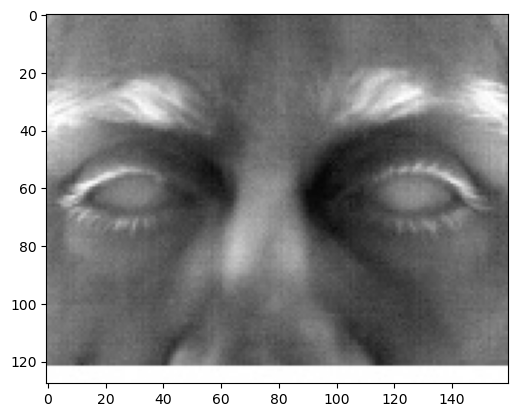

In [17]:
# convert pixels to 2D Images
image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober\\31_antonis_1_e_M_45_76.jpg")

plt.imshow(255 - image)

plt.show()

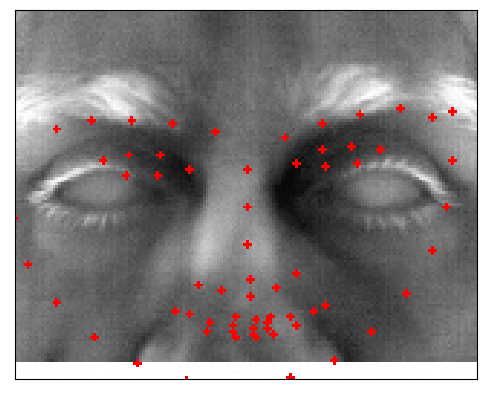

In [18]:
#Extract the Facial Landmarks
image,facial_landmarks = get_landmarks(255 - image)

#Display the Facial Landmarks on the Image
plot_image_landmarks(image,facial_landmarks)

In [19]:
#@title Instructor Solution
def get_all_landmarks_euclid_dist(face_landmarks):
  
    e_dist = []
    for i, j in itertools.combinations(range(68), 2):
      e_dist.append(distance.euclidean(face_landmarks[i], face_landmarks[j]))
    
    return e_dist

In [21]:
#@title Function that preprocesses the data to extract distances between all points

def preprocess_data(df):
  
  X = []
  Y = []
  X_pixels = []
  
  n_pixels = 2304
  
  for index, row in (df.iterrows()):

      if index%1000 == 0:
        print (index, "Datapoints Processed")
        
      try:
          image = get_pixels_image(row['pixels'],0)
          X_pixels.append(image.ravel()) 
          image = cv2.GaussianBlur(image,(5,5),0)
         
          _,face_landmarks = get_landmarks(image)
          X.append(get_all_landmarks_euclid_dist(face_landmarks)) # Using our feature function!
          Y.append(row['emotion'])

      except Exception as e:
          print ("An error occured:",e)

  #Save the data 
  np.save("pureX", X_pixels)
  np.save("dataX", X)
  np.save("dataY", Y)
  
  return np.array(X_pixels),np.array(X),np.array(Y) 

In [24]:
# set to True if we want to preload data -- which has already been generated for us :) 
preload = True 

if preload: 

  # load outputs saved in this folder after running preprocess_data() 
  dataX
  dataY
  
else: 
  
  # this takes 15-20 minutes to run, but someone has already run it and saved the ouputs in this folder
  pureX, dataX, dataY = preprocess_data(df)

In [26]:
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.1, random_state=42,stratify =dataY)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.493

In [31]:
####Standardize the data####################
###Note: Do not use test data to fit your Standardscaler Model
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(18000, 2278)

In [34]:
#Reduces features by maintaining 95% variance of the data
#After doing PCA on our training data, 2278 Dimensions --->reduced to 20
#Note: PCA is trained only on training data 
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)

In [36]:
X_train.shape

(18000, 9)

In [38]:
#@title How will our model operate? { display-mode: "form" }

#@markdown What are our inputs? 
inputs = "distances between facial landmarks" #@param ["images", "facial landmarks", "distances between facial landmarks", "Fill Me In"]

#@markdown What are our outputs? 
outputs = "integer encoded emotions" #@param ["integer encoded emotions", "images", "image edges", "Fill Me In"]

#@markdown What kind of problem will our AI model solve? 
problem_type  = "classification" #@param ["classification", "regression","Fill Me In"]


if inputs == "distances between facial landmarks":
  print("Yes, our inputs are our distance between facial landmarks!")
else:
  print('Not quite our inputs.')

if outputs == "integer encoded emotions":
  print("Yes, our outputs are integer encoded emotions!")
else:
  print('Not quite our outputs.')
  
if problem_type == "classification":
  print("We are trying to predict labels, therefore this is classification!")
else:
  print('Not quite our problem!')

Yes, our inputs are our distance between facial landmarks!
Yes, our outputs are integer encoded emotions!
We are trying to predict labels, therefore this is classification!


In [40]:
#@title Instructor Solution for Previous Two Code Cells { display-mode: "form" }
# student code may look something like...

#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))

#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################

print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.462
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.411
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.4575


In [42]:
'''
Plots the confusion Matrix and saves it
Pass the true labels and the predicted labels
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = list(label_map.values())
  df_cm = pd.DataFrame(cm,index = labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

In [44]:
plot_confusion_matrix(y_test,y_predlr)

Plotting the Confusion Matrix


In [46]:
#@title Take a look at your confusion Matrix and answer the following questions

#@markdown Name most correctly classified emotion? 
correct_emotion = "Surprise"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Name most incorrectly classified emotion? 
incorrect_emotion = "Sad"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Sad Emotion is highly misclassified as?
sad_misclassify ="Neutral"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Neutral Emotion is highly misclassified as?
neutral_misclassify ="Sad"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 


#@markdown Angry Emotion is highly misclassified as?
angry_misclassify ="Neutral"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 



In [48]:
#Load the true pixel data and corresponding labels
X
Y

array([0, 4, 4, ..., 0, 2, 0], dtype=int64)

In [53]:
#@title Instructor Solution
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify =Y)


#Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#PCA #Returns 264 features out of 2304
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)


# student code may look something like...

#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))



#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################

print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.3545
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.3155
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.404


In [55]:
from joblib import dump
dump(dt, "emo-detection-model.joblib") 

['emo-detection-model.joblib']

In [57]:
# extract images as vectors, convert from strings to ints -- this is called a "list comprehension" 
x_image = np.array( [np.fromstring(df['pixels'][i], dtype=np.uint8, sep=" ") for i in range(len(df))] ) 

# extract labels in the same way--through a list comprehension
y_image = np.array( [df['emotion'][i] for i in range(len(df)) ])

# generate train-test (90/10) splits
X_train, X_test, y_train, y_test = train_test_split(x_image, y_image, test_size=0.1,random_state=42)

# define the model
knn = KNeighborsClassifier(n_neighbors=10)

# train 
print ("training knn model ...")
knn.fit(X_train, y_train)

# test
print ("Predict for KNN Model")
y_pred_knn = knn.predict(X_test)

# display results
print ("KNN Test Accuracy on raw image inputs:", metrics.accuracy_score(y_test, y_pred_knn))

training knn model ...
Predict for KNN Model
KNN Test Accuracy on raw image inputs: 0.359
